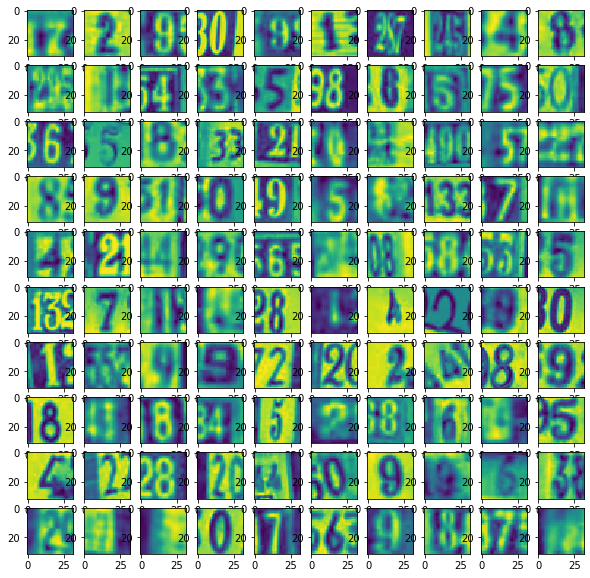

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.optimizers import adam
import matplotlib.pyplot as plt
import h5py

h5f = h5py.File('savedir/SVHN_single_grey1.h5', 'r')
# Load the training, test and validation set
x_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
x_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]

# Close this file
h5f.close()

#Visualizing dataset

fig=plt.figure(figsize=(10,10))
col=10
row=10

for i in range (1,row*col+1):
    img=x_test[i]
    fig.add_subplot(row,col,i)
    plt.imshow(img)
plt.show()  

In [3]:
         
#checking shape of x_train and x_test 

print("train data shapes",x_train.shape)
print("test data shapes",x_test.shape)

train data shapes (42000, 32, 32)
test data shapes (18000, 32, 32)


In [4]:
#42000 train images of shape 32,32
#18000  test images of shape 32,32

input_shape=(32,32) #32h*32w

#x_train and x_test have to reshaped as keras expect data in shape(Number of samples,height,width,number of color channels(1 for black and 3 for color))

x_train=x_train.reshape(x_train.shape[0],32,32,1)
x_test=x_test.reshape(x_test.shape[0],32,32,1)
#checking new shapes
print("reshaped train data shape",x_train.shape)
print("reshaped test data shapes",x_test.shape)

reshaped train data shape (42000, 32, 32, 1)
reshaped test data shapes (18000, 32, 32, 1)


In [5]:
# Making sure that the values are float so that we can get decimal points after division
x_train=x_train.astype('float32')
x_test=x_test.astype('float32') 

# Normalizing the RGB codes by dividing it with the max RGB value. 
x_train =x_train/255.0
x_test=x_test/255.0        

# Convert class vectors to binary class matrices.

y_train=tf.keras.utils.to_categorical(y_train)
y_test=tf.keras.utils.to_categorical(y_test)

#Implementing the neural network
input_shape=(32,32,1) 
batch_size=32
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1024, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=10, validation_split=0.1)

Train on 37800 samples, validate on 4200 samples
Epoch 1/10
37800/37800 [==============================] - 89s 2ms/sample - loss: 0.8833 - acc: 0.7148 - val_loss: 0.4767 - val_acc: 0.8638 0.69 -  - ETA: 7s - loss: 0.9215 - acc - ETA: 7s - loss: 0.9189 - acc: 0.701 - ETA: 7s - loss: 0.9184 - acc: 0 - ETA: 6s - loss: 0.9163 - acc:  - ETA: 6s - loss: 0.9143 - acc: 0.7 - ETA: 6s - los - ETA: 4s - l - ETA: 2s - loss: 0.8966 - acc: 0.710 - ETA: 2s - loss: 0.8961 - acc: 0.710 - ETA: 2s - loss: 0.8958 - acc: 0.71 - ETA: 2s - loss: 0.8949 - acc:  - ETA: 2s 
Epoch 2/10
37800/37800 [==============================] - 108s 3ms/sample - loss: 0.4187 - acc: 0.8752 - val_loss: 0.3813 - val_acc: 0.88762 - acc: 0. - ETA: 1:25 - loss: 0.4596 - - ETA: 1:30 - loss: 0.4643 - acc: 0.870 - ETA: 1:30 - loss: 0.4644 - acc:  - ETA: 1:28 - loss: 0 - ETA: 1:23 - loss: 0.4652 - acc: 0.86 - ETA: 1:22 - loss: 0.4651 - acc: 0 - ETA: 1:21 - loss: 0.4693 - acc: 0.8 - ETA: 1:21 - loss: 0.4666 - acc: 0.86 - ETA: 1:20 - lo

In [6]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)              

In [7]:
score=model.evaluate(x_test, y_test, verbose=0)
score1=model.evaluate(x_train, y_train, verbose=0)
print('Test loss without BatchNormalization',score[0])
print('Test accuracy without BatchNormalization',score[1])
print('Train loss without BatchNormalization',score1[0])
print('Train accuracy without BatchNormalization',score1[1])

Test loss without BatchNormalization 0.38962753663957117
Test accuracy without BatchNormalization 0.91105556
Train loss without BatchNormalization 0.10380131194607488
Train accuracy without BatchNormalization 0.9712143


In [8]:
#With batchnormalization

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1024, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=10, validation_split=0.1)

Train on 37800 samples, validate on 4200 samples
Epoch 1/10
37800/37800 [==============================] - 251s 7ms/sample - loss: 0.7260 - acc: 0.7793 - val_loss: 0.4833 - val_acc: 0.8571
Epoch 2/10
37800/37800 [==============================] - 259s 7ms/sample - loss: 0.4150 - acc: 0.8755 - val_loss: 0.6383 - val_acc: 0.8407
Epoch 3/10
37800/37800 [==============================] - 256s 7ms/sample - loss: 0.3438 - acc: 0.8966 - val_loss: 0.3563 - val_acc: 0.9002
Epoch 4/10
37800/37800 [==============================] - 243s 6ms/sample - loss: 0.2871 - acc: 0.9118 - val_loss: 0.3796 - val_acc: 0.8857
Epoch 5/10
37800/37800 [==============================] - 252s 7ms/sample - loss: 0.2476 - acc: 0.9259 - val_loss: 0.3182 - val_acc: 0.9045ss: 0.2482 - acc - ETA: 4s - loss: 0.2478 - ETA: 1s - loss: 0.2475 - acc:
Epoch 6/10
37800/37800 [==============================] - 255s 7ms/sample - loss: 0.2143 - acc: 0.9339 - val_loss: 0.3658 - val_acc: 0.8902
Epoch 7/10
37800/37800 [==============

In [10]:
print(model.summary())
score=model.evaluate(x_test, y_test, verbose=0)
score1=model.evaluate(x_train, y_train, verbose=0)
print('Test loss with BatchNormalization',score[0])
print('Test accuracy with BatchNormalization',score[1])
print('Train loss with BatchNormalization',score1[0])
print('Train accuracy with BatchNormalization',score1[1])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 30, 30, 32)        320       
_________________________________________________________________
batch_normalization_4 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
batch_normalization_5 (Batch (None, 13, 13, 64)        256       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 4, 4, 128)        

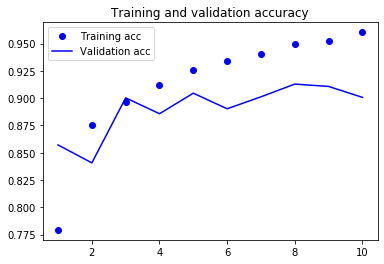

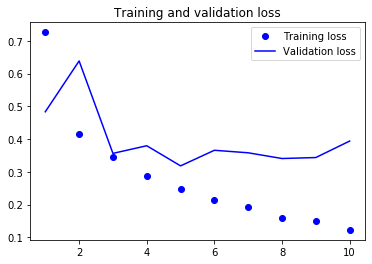

In [11]:
#plot
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()